In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars,reset
from lowEBMs.Packages.Functions import plotmeanstd
from lowEBMs import update_plotstyle
import matplotlib
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.1
time_sec_year=60*60*24*365
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [ ]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
variable_importer(configCTRLVolc1D,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

configVolc_EVA=importer('Dev_Data/Volcanic_EVA_Optimization.ini')
variable_importer(configVolc_EVA,False)#,accuracy_number=2000,accuracy=1e-4)
configVolc_EVA,ParasVolc_EVA=add_sellersparameters(configVolc_EVA,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=CTRLVolc1D_ZMT,CTRLVolc1D_GMT
Volc_EVA=rk4alg(model_equation,configVolc_EVA['eqparam'],configVolc_EVA['funccomp'])

In [ ]:
plt.plot(CTRLVolc1D[0],CTRLVolc1D[2])

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
C=np.zeros(len(Vars.Read['P']))
print(Vars.Read['P'])
for i in range(len(Vars.Read['P'])):
    C[i]=np.average(Vars.Read['P'][i],weights=np.cos(Vars.Lat2*np.pi/180))
#plt.ylim(-0.9,0.2)
#ax[0].xlim(1980,2010)
#plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[2])#-CTRLVolc1D_GMT)
ax[0].plot(Volc_EVA[0]/time_sec_year,moving_average(Volc_EVA[2],36))#-CTRLVolc1D_GMT,36))
#C=print(np.shape(np.array(Vars.Read['C'])))
ax[1].plot(Volc_EVA[0][1:]/time_sec_year,moving_average(C,365))

In [2]:
from lowEBMs.Packages.Configuration import import_parallelparameter, allocate_parallelparameter, write_parallelparameter
from lowEBMs.Packages.Variables import variable_importer_parallelized, builtin_importer_parallelized

In [3]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
raw=import_parallelparameter('Dev_Data/EnsembleConfig.ini')
allocated,setup=allocate_parallelparameter(raw)
#variable_importer(configCTRLVolc1D,False)
variable_importer_parallelized(configCTRLVolc1D,setup,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
configCTRLVolc1D=write_parallelparameter(configCTRLVolc1D,allocated,setup)
#print(configCTRLVolc1D)
#print(np.shape(Vars.T))
#print(configCTRLVolc1D['funccomp']['funcparam']['func2'])
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

Loading Configuration from: Dev_Data/Volcanic_CTRL.ini
Loading fit-configuration from: Dev_Data/EnsembleConfig.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
{'eqparam': {'c_ao': 294000000.0}, 'rk4input': {'number_of_integration': 29200, 'stepsize_of_integration': 86400, 'spatial_resolution': 10, 'both_hemispheres': True, 'latitudinal_circle': False, 'latitudinal_belt': True, 'eq_condition': False, 'eq_condition_length': 100, 'eq_condition_amplitude': 0.001, 'data_readout': 5, 'number_of_externals': 0}, 'funccomp': {'funclist': {'func0': <function flux_down.insolation at 0x7fd2ce3e0400>, 'func1': <function flux_up.sellers at 0x7fd2ca2ab598>, 'func2': <function transfer.sellers at 0x7fd2ca2ab6a8>}, 'funcparam': {'func0': {'q': 1366.14, 'm': 1, 'dq': 0, 'albedo': <function albedo.dynamic_sel at 0x7fd2ca2ab378>, 'albedoread': True, 'albedoparam': [array([2272. , 1420. ,  388. ,    5. ,    5. ,  1


Simulation finished within 92.62084722518921 seconds


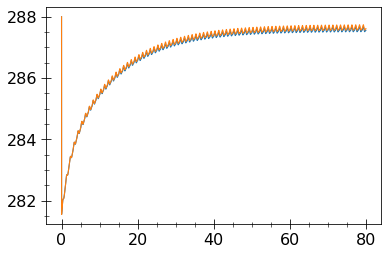

In [4]:
plt.plot(CTRLVolc1D[0]/time_sec_year,CTRLVolc1D[2])
#print(CTRLVolc1D[2][-1,0],CTRLVolc1D[2][-1,1])

In [33]:
#plt.plot(Vars.Lat,Vars.Read['alpha'][:][0])
print(Vars.Read['alpha'])
#plt.plot(Vars.Lat,Vars.Read['solar'][0])

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
 ... 0 0 0]


In [12]:
import time
num=3
dim=3
a=np.array([1,2,3])
b=np.array([1,4,5])
c=np.array([1,0,2])
data=np.array([a,b])
data1=np.array([c,c])
print(data)
print(data1)
print(data[:,1:]-data1[:,:-1])
print(300**6)

[[1 2 3]
 [1 4 5]]
[[1 0 2]
 [1 0 2]]
[[1 3]
 [3 5]]
729000000000000


In [7]:
x=np.array([2,2,2])
number_of_parallels=2
np.array([x]*number_of_parallels)

array([[2, 2, 2],
       [2, 2, 2]])